# Plots for validated Data 

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown
pd.option_context('display.max_columns', -1)
pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

/tmp/ipykernel_168612/1899440786.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import glob,imp,os,shutil


In [2]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('TRV1qq_data.pcl')
print(dataDF.columns.values.tolist()) #Print all columns names#


['filename', 'mass.5000001', 'width.5000001', 'extpar.1', 'xsec8TeV(fb).5000001', 'BRs.y1.b,b', 'BRs.y1.c,c', 'BRs.y1.q,q', 'BRs.y1.t-,t+', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'SMS Decomposition', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'OutputStatus.sigmacut', 'OutputStatus.minmassgap', 'OutputStatus.maxcond', 'OutputStatus.ncpus', 'OutputStatus.model', 'OutputStatus.promptwidth', 'OutputStatus.stablewidth', 'OutputStatus.eraseprompt', 'OutputStatus.checkinput', 'OutputStatus.doinvisible', 'OutputStatus.docompress', 'OutputStatus.computestatistics', 'OutputStatus.testcoverage', 'OutputStatus.combinesrs', 'OutputStatus.reportallsrs', 'OutputStatus.experimentalfeatures', 'OutputStatus.file status', 'OutputStatus.decomposition status', 'OutputStatus.warnings', 'OutputStatus.input file', 'OutputStatus.datab

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)
pd.set_option('display.float_format', '{:e}'.format)
dataDF

,filename,mass.5000001,width.5000001,extpar.1,xsec8TeV(fb).5000001,"BRs.y1.b,b","BRs.y1.c,c","BRs.y1.q,q","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_167_MZp_1700_gB_1.349141E+00.slha,1.700433e+03,4.104564e+00,1.349141e+00,2.321800e+02,1.666844e-01,1.666844e-01,1.666844e-01,1.665782e-01,0.000000e+00,2.321800e+02,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",7.737691e+01,0.000000e+00,2.321800e+02,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1qq_slha/run_42_MZp_649_gB_4.599776E-01.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1qq_slha/run_167_MZp_1700_gB_1.349141E+00.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,1.548031e+02,1.219720e+02,NaN,[TRV1qq],"[(y1, 1700.4)]",ATLAS-EXOT-2013-11,NaN,8.000000e+00,2.030000e+01,upperLimit,1.269169e+00,NaN,"[(y1, 4.1046)]"
1,run_48_MZp_649_gB_1.154425E+00.slha,6.491725e+02,1.141154e+00,1.154425e+00,2.182000e+04,1.675849e-01,1.675849e-01,1.675849e-01,1.620754e-01,0.000000e+00,2.182000e+04,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",7.193188e+03,0.000000e+00,2.182000e+04,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1qq_slha/run_42_MZp_649_gB_4.599776E-01.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1qq_slha/run_48_MZp_649_gB_1.154425E+00.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,1.462681e+04,1.012840e+04,NaN,[TRV1qq],"[(y1, 649.2)]",ATLAS-EXOT-2013-11,NaN,8.000000e+00,2.030000e+01,upperLimit,1.444138e+00,NaN,"[(y1, 1.1412)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,run_14_mzp_1430_gB_0.6277443.slha,1.430000e+03,7.472187e+00,6.277443e-01,1.418800e+02,1.667023e-01,1.667023e-01,1.667023e-01,1.664887e-01,0.000000e+00,1.418800e+02,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",4.727314e+01,0.000000e+00,1.418800e+02,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1qq_slha/run_42_MZp_649_gB_4.599776E-01.slha,1.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,TRV1qq_slha/run_14_mzp_1430_gB_0.6277443.slha,3.0.0-beta,3.0.0-beta,0.000000e+00,9.460689e+01,1.374220e+02,NaN,[TRV1qq],"[(y1, 1430.0)]",ATLAS-EXOT-2013-11,NaN,8.000000e+00,2.030000e+01,upperLimit,6.884406e-01,NaN,"[(y1, 7.4722)]"
204,run_128_MZp_1250_gB_1.349141E+00.slha,1.250075e+03,3.016684e+00,1.349141e+00,1.374200e+03,1.667280e-01,1.667280e-01,1.667280e-01,1.663600e-01,0.000000e+00,1.374200e+03,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",4.577295e+02,0.000000e+00,1.374200e+03,0.000000e+00,0.000000e+00,50,2.000000e-01,1,TRV1qq_slha/run_42_MZp_649_gB_4.599776E-01.slha,1.000000e+00,1.000

#### Set r = 0 for points with no results 

In [4]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [5]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [6]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 205
Total excluded (LHC) = 118
Total allowed = 87



### Create analysis label for excluded points

In [7]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


In [8]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(118, 54)


In [9]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

ATLAS-EXOT-2013-11 (TRV1qq): 118


In [10]:
data= pd.read_pickle('/home/yoxara/smodels-database/8TeV/ATLAS/ATLAS-EXOT-2013-11/orig/xsec_UL_8TeV.pcl')
data

,gB,my1 [GeV],sigma [pb],width [GeV],BR_b & b,BR_c & c,BR_s & s,BR_u & u,BR_d & d,BR_t & t,weight [pb]
6,1.048686e+00,5.994162e+02,2.503300e+01,8.675620e+00,1.679603e-01,1.679603e-01,1.679603e-01,1.679603e-01,1.679603e-01,1.601987e-01,1.681820e+01
7,9.617526e-01,6.491725e+02,1.511200e+01,7.920262e+00,1.675849e-01,1.675849e-01,1.675849e-01,1.675849e-01,1.675849e-01,1.620754e-01,1.013017e+01
...,...,...,...,...,...,...,...,...,...,...,...
23,1.060887e+00,1.600921e+03,2.084300e-01,2.389397e+01,1.666892e-01,1.666892e-01,1.666892e-01,1.666892e-01,1.666892e-01,1.665539e-01,1.389721e-01
24,1.198151e+00,1.700433e+03,1.829300e-01,3.237244e+01,1.666844e-01,1.666844e-01,1.666844e-01,1.666844e-01,1.666844e-01,1.665782e-01,1.219663e-01


In [11]:
data= pd.read_pickle('/home/yoxara/smodels-database/8TeV/ATLAS/ATLAS-EXOT-2013-11/orig/xsec_UL_8TeV.pcl')
data

,gB,my1 [GeV],sigma [pb],width [GeV],BR_b & b,BR_c & c,BR_s & s,BR_u & u,BR_d & d,BR_t & t,weight [pb]
6,1.048686e+00,5.994162e+02,2.503300e+01,8.675620e+00,1.679603e-01,1.679603e-01,1.679603e-01,1.679603e-01,1.679603e-01,1.601987e-01,1.681820e+01
7,9.617526e-01,6.491725e+02,1.511200e+01,7.920262e+00,1.675849e-01,1.675849e-01,1.675849e-01,1.675849e-01,1.675849e-01,1.620754e-01,1.013017e+01
...,...,...,...,...,...,...,...,...,...,...,...
23,1.060887e+00,1.600921e+03,2.084300e-01,2.389397e+01,1.666892e-01,1.666892e-01,1.666892e-01,1.666892e-01,1.666892e-01,1.665539e-01,1.389721e-01
24,1.198151e+00,1.700433e+03,1.829300e-01,3.237244e+01,1.666844e-01,1.666844e-01,1.666844e-01,1.666844e-01,1.666844e-01,1.665782e-01,1.219663e-01


In [12]:
MZp = data['my1 [GeV]']
xsec = data['weight [pb]']
gB = data['gB']
width = data['width [GeV]']
gB

6    1.048686e+00
7    9.617526e-01
         ...     
23   1.060887e+00
24   1.198151e+00
Name: gB, Length: 19, dtype: float64

In [13]:
Percentage = (width/MZp)*100
Percentage

6    1.447345e+00
7    1.220055e+00
         ...     
23   1.492514e+00
24   1.903776e+00
Length: 19, dtype: float64

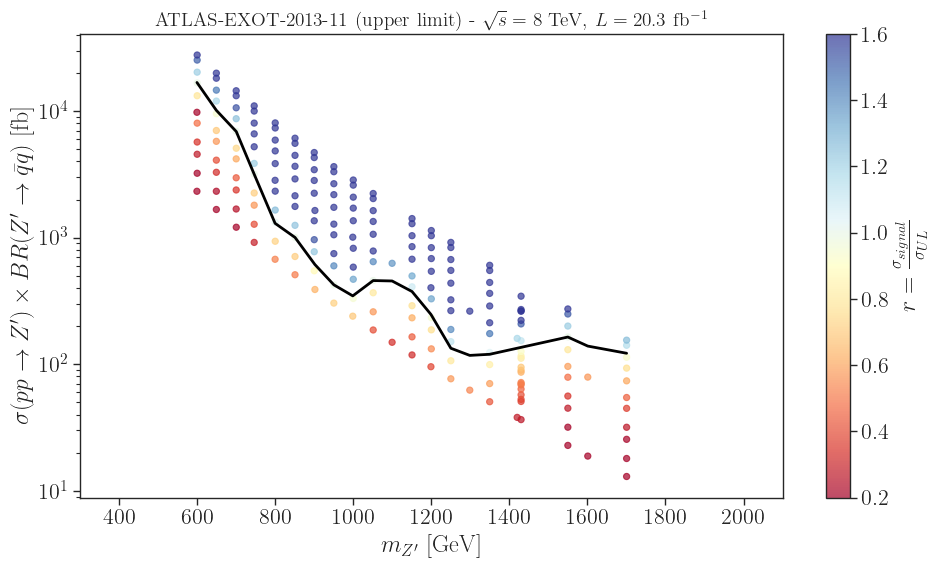

In [14]:
from scipy.interpolate import griddata
cm = plt.colormaps['RdYlBu']
plt.figure(figsize=(10,6))
#dataDF = dataDF[dataDF['mass.5000001'] >= 351].reset_index(drop=True)
#dataDF = dataDF[dataDF['mass.5000001'] <= 2000].reset_index(drop=True)
x = dataDF['mass.5000001']
y = dataDF['xsec8TeV(fb).5000001'] * (3*dataDF['BRs.y1.q,q'] + dataDF['BRs.y1.c,c'])
c = dataDF['ExptRes.result0.r']

order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s=20, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)

levels = [1.0]  

#xi = np.linspace(min(x), max(x), 3000)
#yi = np.linspace(min(y), max(y), 3000)
#Xi, Yi = np.meshgrid(xi, yi)#Zi = griddata((x, y), c, (Xi, Yi), method='cubic')
#xi = np.linspace(x.min(), x.max(), 3000)
#log_yi = np.linspace(np.log10(y.min()), np.log10(y.max()), 3000)
#xi, log_yi = np.meshgrid(xi, log_yi)
#zi = griddata((x, np.log10(y)), c, (xi, log_yi), method='cubic')
#yi = 10**log_yi
#cs = plt.contour(Xi, Yi, Zi, levels=levels, colors='magenta', linestyles='solid', linewidths=2)
#cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
xsec_fb = [x * 1000 for x in xsec]
plt.plot(MZp, xsec_fb, color='black', linewidth=2.0, linestyle='solid')
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{q} q)$ [fb]')
plt.xlim(300, 2100)
#plt.ylim(1e-02, 5e04)
plt.yscale('log')
plt.title('ATLAS-EXOT-2013-11 (upper limit) -  $\sqrt{s} = 8$ TeV, $L = 20.3$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()

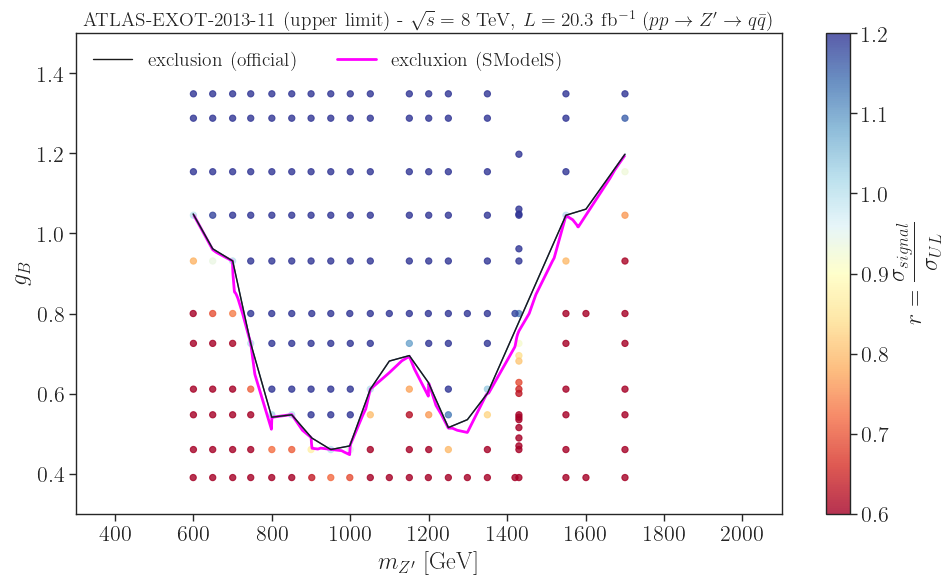

In [15]:
from scipy.interpolate import Rbf
from scipy.interpolate import griddata
plt.figure(figsize=(10,6))
x = dataDF['mass.5000001']
y = dataDF['extpar.1']
c = dataDF['ExptRes.result0.r']
x = x[c.argsort()]
y = y[c.argsort()]
c = c[c.argsort()]
sc = plt.scatter(x,y,c=c,s=20,cmap=cm, vmin=0.6, vmax=1.2, alpha=0.8)
#cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
idx = c.argsort()
x, y, c = x[idx], y[idx], c[idx]
xi = np.linspace(x.min(), x.max(), 1000)
yi = np.linspace(y.min(), y.max(), 1000)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), c, (xi, yi), method='linear')
cs = plt.contour(xi, yi, zi, levels=levels, colors='magenta', linestyles='solid', linewidths=2)
plt.plot(MZp,gB,'-',color='b',linewidth=1,markersize=0.5)
observed_line, = plt.plot(MZp,gB, 'k', linewidth=1, label='exclusion (official)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2, linestyle='solid', label='excluxion (SModelS)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper left', framealpha=0.0, fontsize=14,ncol=2)
plt.colorbar(sc, label=r'$$r = \frac{\sigma_{signal}}{\sigma_{U L}}$$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$g_{B}$')
plt.xlim(300, 2100)
plt.ylim(0.3, 1.5)
# plt.xscale('log')
# plt.yscale('log')
plt.tight_layout()
plt.title(r'ATLAS-EXOT-2013-11 (upper limit) - $\sqrt{s} = 8$ TeV, $L = 20.3$ fb$^{-1}$  ($ p p \to Z^{\prime} \to q \bar{q}$)', fontsize=14)
plt.savefig('ATLAS-EXOT-2013-11_UL.png', bbox_inches='tight')
plt.show()

In [16]:
contour_line_cs = cs.collections[0].get_paths()[0].vertices
contour_x_cs = contour_line_cs[:, 0]
contour_y_cs = contour_line_cs[:, 1]
contour_interpolator_cs = interp1d(contour_x_cs, contour_y_cs, kind='linear', bounds_error=False, fill_value='extrapolate')
contour_y_cs_at_MZp_Obs = contour_interpolator_cs(MZp)
experved_derivative_exp = np.gradient(gB, MZp)
contour_derivative_cs = np.gradient(contour_y_cs_at_MZp_Obs, MZp)
ratio_Obs = experved_derivative_exp / contour_derivative_cs
print(ratio_Obs)

[0.98141923 0.87917876 1.01946253 1.03153758 1.01127241 0.82150336
 1.02468529 1.23387769 1.02702756 1.08322181 1.04986102 0.90624742
 0.98917662 0.97049043 1.03101005 0.7525304  1.42431516 1.23317763
 0.91533683]
